**Aula:** *APRENDIZADO DINÂMICO*<br>
**Professor:** *Cibele Russo*<br>
**Aluno:** *Guilherme Lourenço*<br>
**Projeto:** *Atividade Final - Aprendizado Dinâmico*


Para esta avaliação, você deve entregar três arquivos:
- um arquivo de dados em .csv com a base resultante das análises
- um relatório em .ipynb com suas análises comentadas
- um arquivo .pdf gerado a partir do .ipynb

Os dados de casos confirmados e mortes diárias por COVID-19 nos Estados Unidos estão
disponíveis no arquivo covid19USA.csv.

1. Você deve fazer a leitura dos dados, estabelecer um índice por datas, verificar se os
dados estão corretos e realizar algum procedimento necessário caso haja dados
faltantes.

## Importação de Bibliotecas

Iniciamos o processo com a importação das Bibliotecas principais para manipulação da base de dados.

- Pandas
- Matplotlib
- Numpy
- Seaborn

Com relação a biblioteca _Matplotlib_, após a importação da biblioteca definimos alguns padrões para a visualização dos gráficos:
- Tamanho do Gráfico: 25 x 6
- Tamanho da Fonte: 14

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

%matplotlib inline

plt.rcParams['figure.figsize'] = (25.0, 6.0) # Define o tamanho padrão das "plotagens"
plt.rc('font', size=14) # Altera o tamanho da fonte

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

## Importação da Base de Dados

Após a importação das bibliotecas, realizamos a importação da base de Dados **covid19USA.csv** que será utilizada durante o processo.

### Tratamentos da base

A importação da base é realizada através da biblioteca _pandas_, indicando a coluna a ser utilizada como _Index_ do DataFrame Pandas.

Após a importação, foi realizado um ajuste no _Index_ da base para que o range das datas estejam completos, além da definição do período padrão do _Index_ como sendo um período	diário.

Caso após o ajuste do _Index_ haja algum valor _nulo_, o número 0 (zero) é utilizado para substituir esse _nulo_.

### Ajuste adicional

Seguindo orientações publicadas no Fórum da Matéria, realizamos o ajuste manual da base de dados alteradando os valores de _deaths_ (mortes) para as seguintes datas:
- 19/03/2020: de **42** para **41**
- 20/03/2020: de **0** para **1**

Essas alterações foram realizadas antes da importação da base para que não tenha grande impacto na codificação do projeto.

In [2]:
# Importação da base de Dados
covid = pd.read_csv('covid19USA.csv', index_col='date', parse_dates=True)

# Ajuste do Index para conter o período completo
idx = pd.date_range(start=covid.index.min(), end=covid.index.max(), freq='D')
covid = covid.reindex(idx)

# Ajuste de possíveis valores nulos/missing
covid.fillna(0, inplace=True)

covid.head()

,confirmed,deaths
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
2020-01-05,0,0


## Dados da Base

A base importada foi as seguintes caracteríticas:

- Atributos:
> - date: data de registro das informações (utilizado no Index) | Período entre 01/01/2020 e 03/09/2020
> - confirmed: casos confirmados de COVID-19 nos Estados Unidos<br>
> - deaths: mortes confirmadas por COVID-19 nos Estados Unidos

- Registros
> - **247** Registros <br>
> - Não foram encontrados nulos (mesmo antes das alterações realizadas na importação da base) <br>
> - Atributos de tipo Inteiro <br>

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-01-01 to 2020-09-03
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   confirmed  247 non-null    int64
 1   deaths     247 non-null    int64
dtypes: int64(2)
memory usage: 5.8 KB


## Análise descritiva

Abaixo podemos ver alguns dados estatístico sobre a distribuição dos dados, bem como sua média e desvio padrão.<br><br>
Após as descritivas, temos o gráfico contendo toda a série temporal da base de dados COVID-19.

In [4]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,247.0,24754.680162,21935.393529,0.0,19.5,23705.0,41252.5,78427.0
deaths,247.0,752.000000,768.724717,0.0,1.0,661.0,1180.5,4928.0


### Distribuição dos Casos confirmados

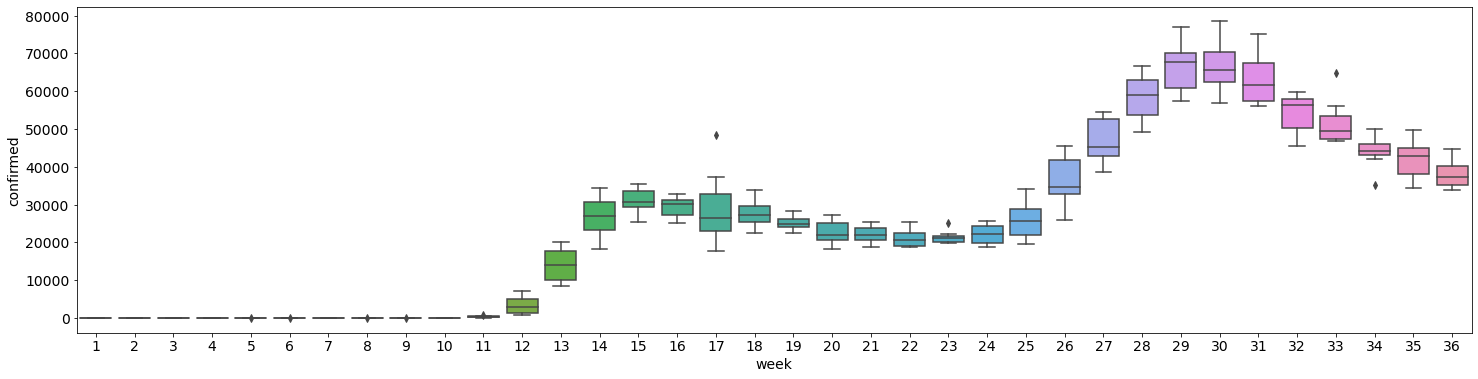

In [5]:
covid['week'] = covid.index.week

sns.boxplot(x=covid.week, y=covid.confirmed);

### Distribuição das Mortes confirmadas

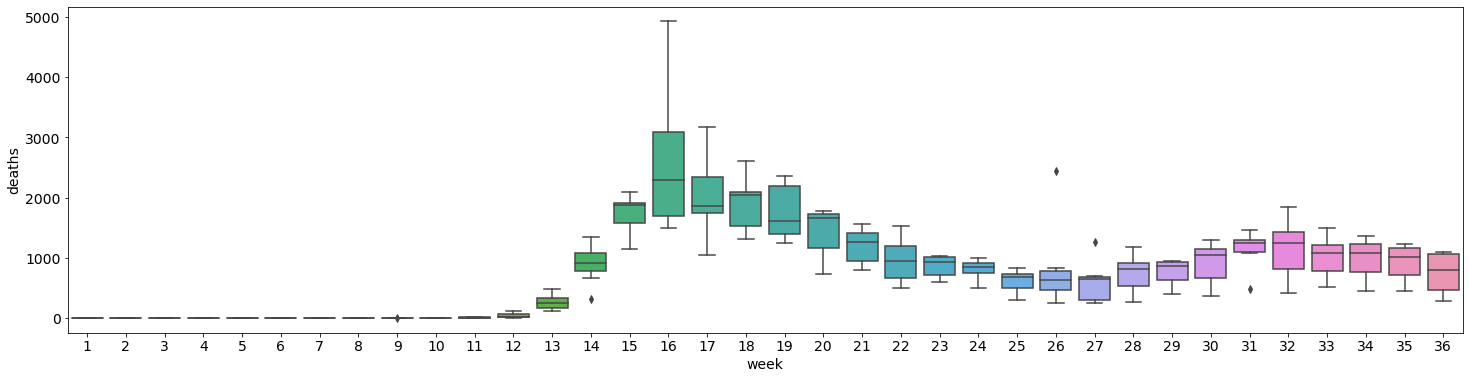

In [6]:
sns.boxplot(x=covid.week, y=covid.deaths);

In [7]:
# Remoção da coluna "week" para mantera as características originais da base
covid.drop(columns=['week'], axis=1, inplace=True)

### Casos confirmados x Mortes confirmadas

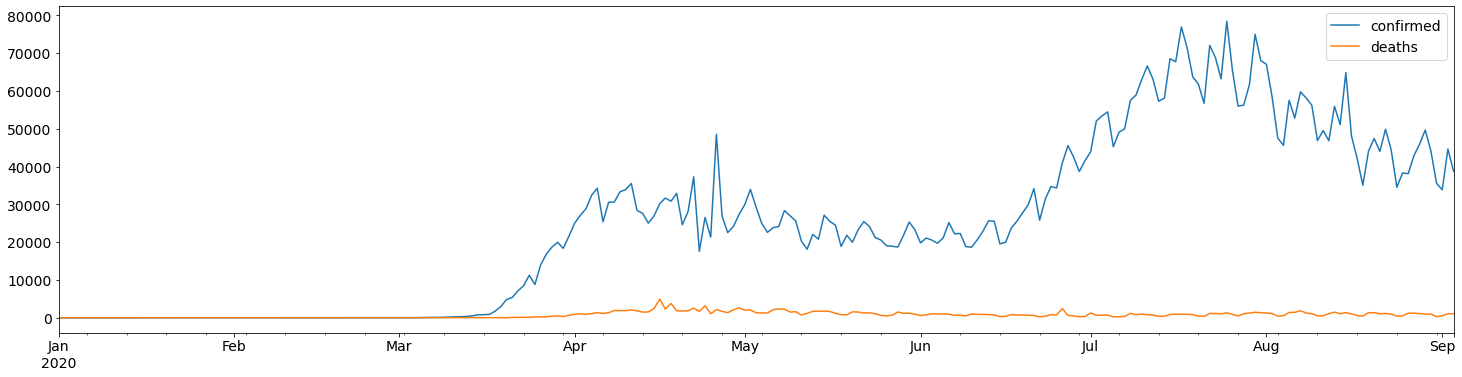

In [8]:
covid.plot();

2. Proponha uma decomposição dos dados de mortes em tendência e sazonalidade.
Obtenha os gráficos de autocorrelação e autocorrelação parcial. Comente
brevemente os resultados.

## Decomposição de Tendência e Sazonalidade

Ao se analisar uma ou mais séries temporais a representação gráfica dos dados sequencialmente ao longo do tempo é fundamental e pode revelar padrões de comportamento importantes.(Ehlers, 2009)

Utilizando a função *seasonal_decompose* da biblioteca *statsmodels.tsa.seasonal*, é possível analisar graficamente a decomposição da Tendência e da Sazonalidade presente na base de dados do COVID-19.


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Modelo - Aditivo

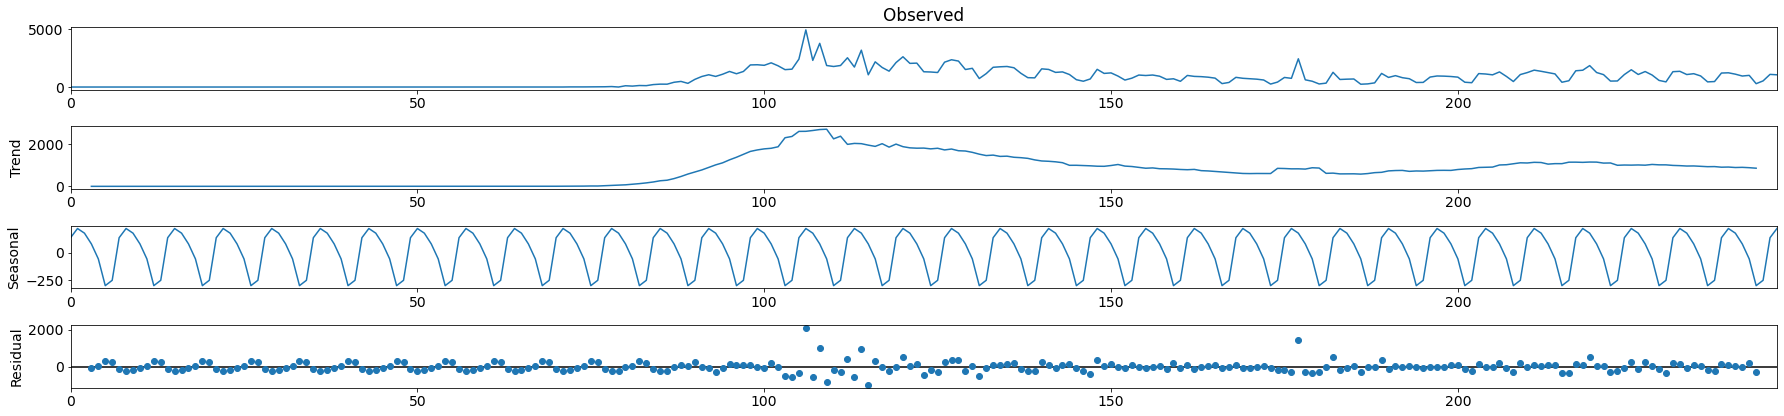

In [10]:
aditivo = seasonal_decompose(np.array(list(covid.deaths)), model='additive', period=7)
aditivo.plot()

plt.show()

### Modelo - Multiplicativo

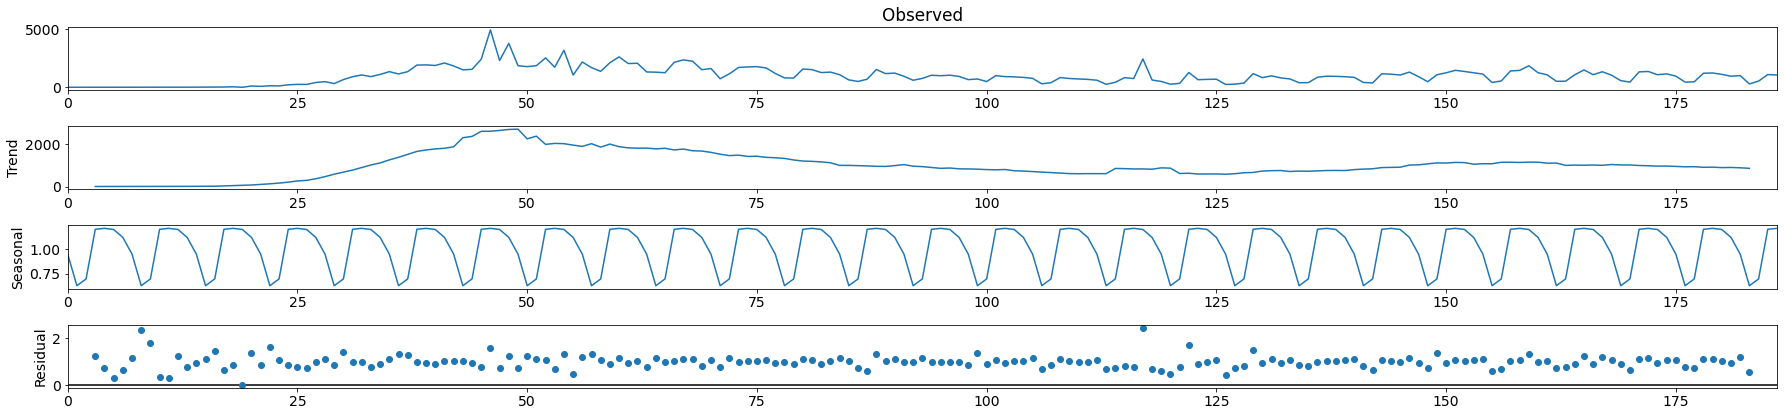

In [11]:
multiplicativo = seasonal_decompose(np.array(list(covid.deaths[covid.deaths > 0])), model='multiplicative', period=7)
multiplicativo.plot()
plt.show()

## Análise dos Resíduos

Após a decomposição da base utilizando modelos _aditivos_ e _multiplicativos_, decidimos seguir com a aplicação de modelos _multiplicativos_ com base na análise dos Resíduos apresentados na decomposição.

Como pode ser observado abaixo, os Resíduos apresentados pelo modelo _multiplicativo_ demonstram uma aleatoriedade, diferente dos Resíduos do modelo _aditivo_ que em seu início apresenta um determinado padrão.

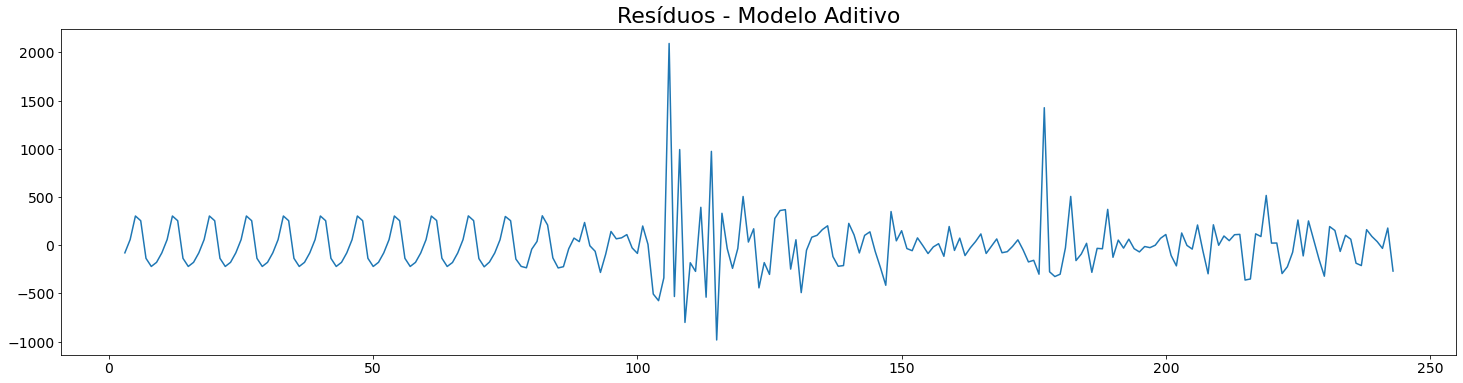

In [12]:
# Exibição gráfica dos resíduos
plt.plot(aditivo.resid)
plt.title("Resíduos - Modelo Aditivo", fontdict = {'fontsize':22})
plt.show();

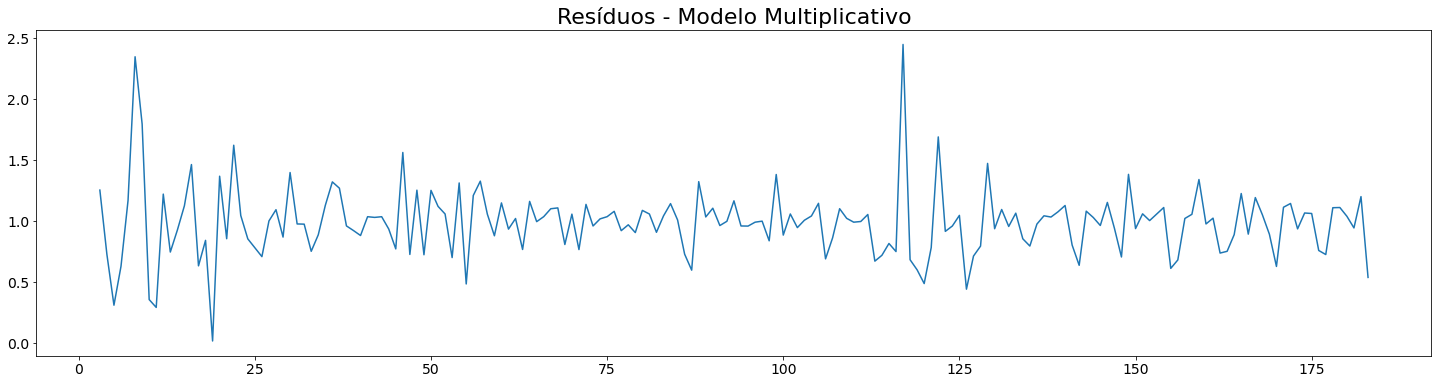

In [13]:
# Exibição gráfica dos resíduos
plt.plot(multiplicativo.resid)
plt.title("Resíduos - Modelo Multiplicativo", fontdict = {'fontsize':22})
plt.show();

## Análise de Autocorrelação e Autocorrelação Parcial

A partir da Análise de Autocorrelação e Autocorrelação Parcial podemos verificar a correlação das observações com as observações anteriores em um dado período.

Com essa informação temos de gráfica o indício de uma aleatoriedade nos dados ou não.

Para a aplicação dos métodos de Autocorrelação e Autocorrelação Parcial estamos utilizando as funções *plot_acf* e *plot_pacf*,respectivamente, sendo que ambas as funções estão disponíveis na biblioteca *statsmodels.graphics.tsaplots*.

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Autocorrelação

Com base no gráfico gerado a partir da função *plot_acf*, vemos que as primeiras observações da base possuem uma alta correlação, sendo que conforme analisamos essa correlação no decorrer do tempo, é possível verificar que a mesma diminui a ponto de se encontrar interiamente dentro do intervalo de confiança.

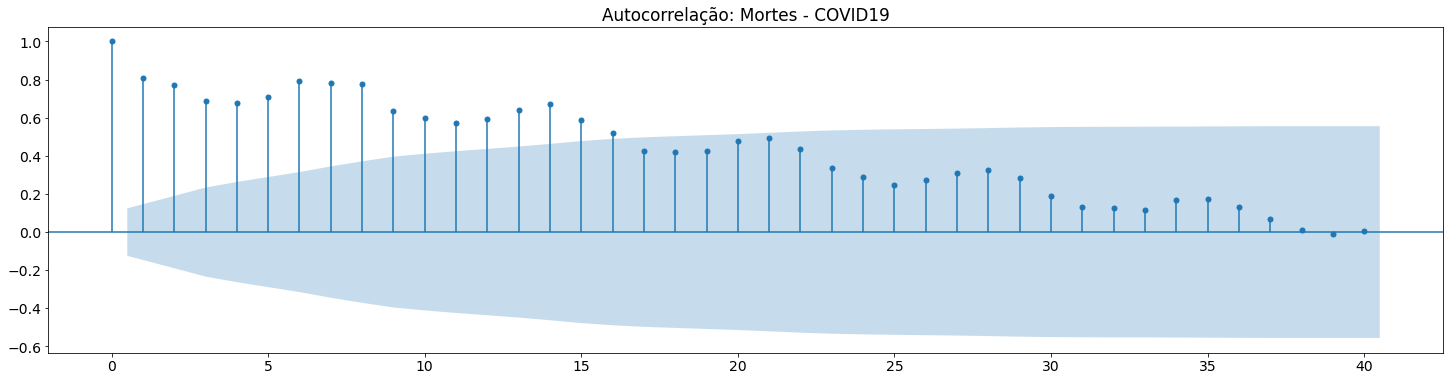

In [15]:
title = 'Autocorrelação: Mortes - COVID19'
lags = 40
plot_acf(covid.deaths, title=title,lags=lags);

### Autocorrelação Parcial

Conforme visualizamos no gráfico de Autocorrelação, o resultado de Autocorrelação Parcial apresenta basicamente os mesmos resultados, quando analisamos o início da base vemos que as observações possuem uma alta correlação e conforme o tempo entre as observações passa essa correlação diminui a um ponto em que as o valor da Autocorrelação se encontra totalmente dentro do intervalo de confiança.

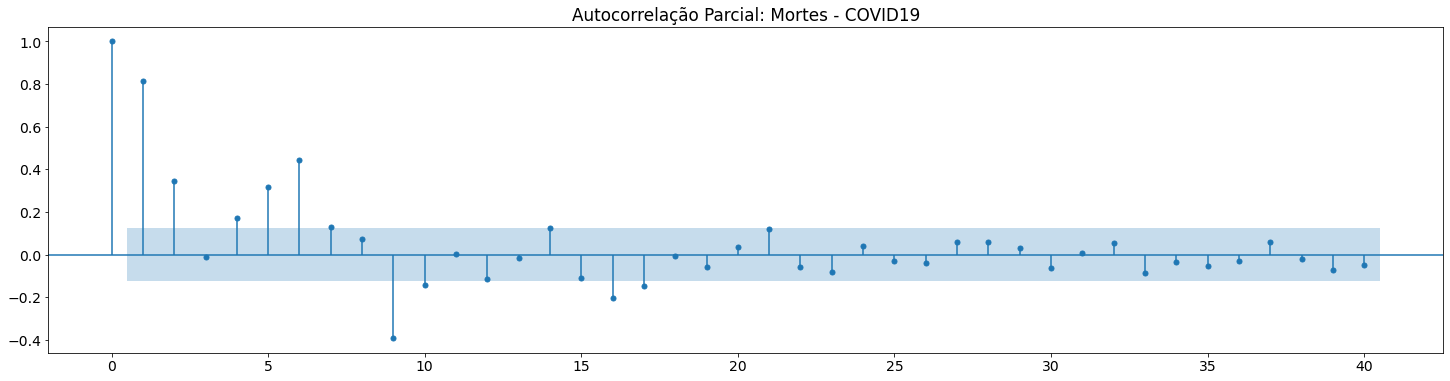

In [16]:
title = 'Autocorrelação Parcial: Mortes - COVID19'
lags = 40
plot_pacf(covid.deaths, title=title,lags=lags);

3. Divida a base em treino e teste, com 21 observações na base de teste. Você deverá
apresentar em distintas colunas na mesma base de dados que será entregue:
- Os dados originais de casos confirmados e mortes.
- As previsões de Holt e Holt Winters para a variável mortes.
- As previsões obtidas pelo melhor modelo SARIMA, com ordens selecionadas
segundo critério preestabelecido para a variável mortes. Identifique as
componentes desse melhor modelo (por exemplo, “o modelo tem uma
componente autorregressiva não sazonal de ordem .., uma componente de
médias móveis não-sazonal de ordem.., etc).
- As previsões obtidas por um modelo de redes dinâmicas para a variável
mortes.

## Particionamento dos Dados

Para o treinamento de modelos, particionamos os dados utilizando os seguintes conceitos:
- Teste: 21 observações
- Treinamento: 226 observações
- Treinamento Ajustado: 166 observações

Para a utilização os modelos de _Holt_ e _Holt-Winters_ foi desconsiderado os registros que tinham o valor **0** para morte do conjunto de Treinamento, para outros modelos (como SARIMA) será considerada os dados sem alterações.

In [17]:
treino = covid.iloc[ : len(covid) -21]
treino_ajustado = treino[treino.deaths > 0]
teste = covid.iloc[len(covid) - 21 : ]

In [18]:
print(f'Qtd. Teste: {len(teste)}\nQtd. Treinamento: {len(treino)}\nQtd. Treinamento ajustado: {len(treino_ajustado)}')

Qtd. Teste: 21
Qtd. Treinamento: 226
Qtd. Treinamento ajustado: 166


### Método Holt

Como método de predição será utilizado o Método _Holt_, sendo este uma variação do método de Amortecimento Exponencial Simples adicionando a informação de tendência, no nosso caso a tendencia será _multiplicativa_.

A aplicação do método será feita através da função _ExponentialSmoothing_ (presente na biblioteca _statsmodels.tsa.api_), sob a base de treinamento e após isso será realizado a predição para os próximos 21 dias e terá o seu valor armazenado na base original de COVID-19.

In [19]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo =  ExponentialSmoothing(treino_ajustado.deaths, trend='mul').fit();
holt_mult = modelo.forecast(21).rename('Holt')

covid['Holt'] = holt_mult

covid.tail(10)

,confirmed,deaths,Holt
2020-08-25,38298,473,1017.232600
2020-08-26,38119,1207,1011.163125
2020-08-27,42848,1228,1005.129865
2020-08-28,45909,1110,999.132603
2020-08-29,49654,949,993.171124
2020-08-30,44143,1006,987.245216
2020-08-31,35581,290,981.354665
2020-09-01,33850,529,975.499261
2020-09-02,44639,1091,969.678795
2020-09-03,38754,1055,963.893057


No gráfico abaixo é possível comparar a predição realizada pelo método Holt com a base de Treinamento e de Teste.

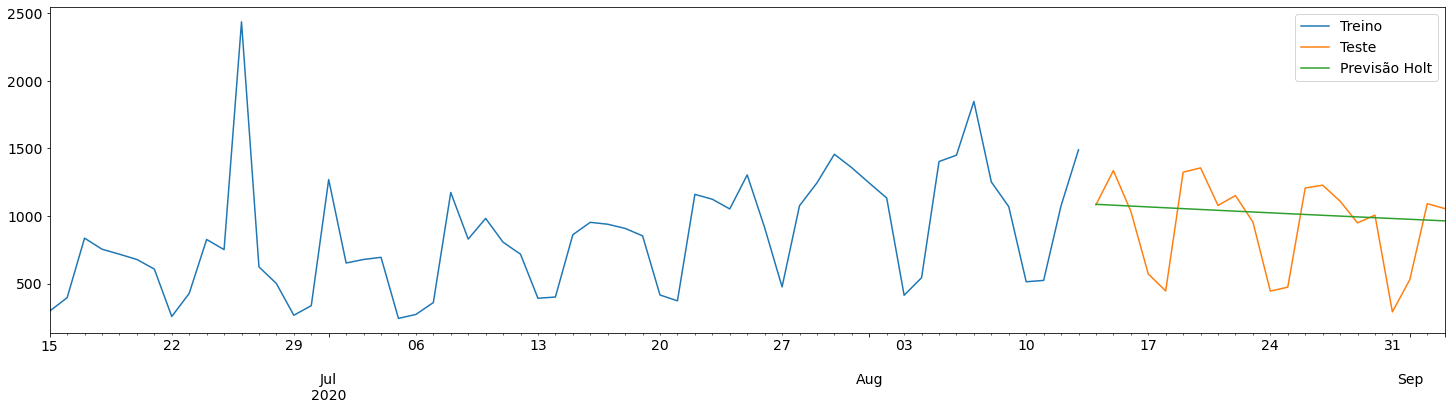

In [20]:
treino['deaths'].iloc[-60:].plot(legend=True, label='Treino')
teste.deaths.plot(legend=True, label='Teste')
holt_mult.plot(legend=True, label='Previsão Holt');

### Método Holt-Winters

Como método de predição será utilizado o Método _Holt-Winters_, sendo este uma variação do método de _Holt_ onde além dainformação de tendência, será adicionado as informações de sazonalidade.

Para este modelo em especifico será realizado o treinamento com base nos seguintes parâmetros:
- Tendência: aditiva
- Sazonalidade: multiplicativa
- Período sazonal: 7 dias

A aplicação do método será feita através da função _ExponentialSmoothing_ (presente na biblioteca _statsmodels.tsa.api_), sob a base de treinamento ajustada e após isso será realizado a predição para os próximos 21 dias e terá o seu valor armazenado na base original de COVID-19.

In [21]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(treino_ajustado.deaths, trend='additive', seasonal='multiplicative', seasonal_periods=7).fit()
holt_winters_mult = modelo.forecast(21).rename('Holt-Winters')

covid['Holt-Winters'] = holt_winters_mult

covid.tail(10)

,confirmed,deaths,Holt,Holt-Winters
2020-08-25,38298,473,1017.232600,637.948705
2020-08-26,38119,1207,1011.163125,1357.011360
2020-08-27,42848,1228,1005.129865,1400.614063
2020-08-28,45909,1110,999.132603,1579.070223
2020-08-29,49654,949,993.171124,1280.547958
2020-08-30,44143,1006,987.245216,1026.494285
2020-08-31,35581,290,981.354665,495.239969
2020-09-01,33850,529,975.499261,651.101433
2020-09-02,44639,1091,969.678795,1384.906999
2020-09-03,38754,1055,963.893057,1429.321724


No gráfico abaixo é possível comparar a predição realizada pelo método Holt com a base de Treinamento e de Teste.

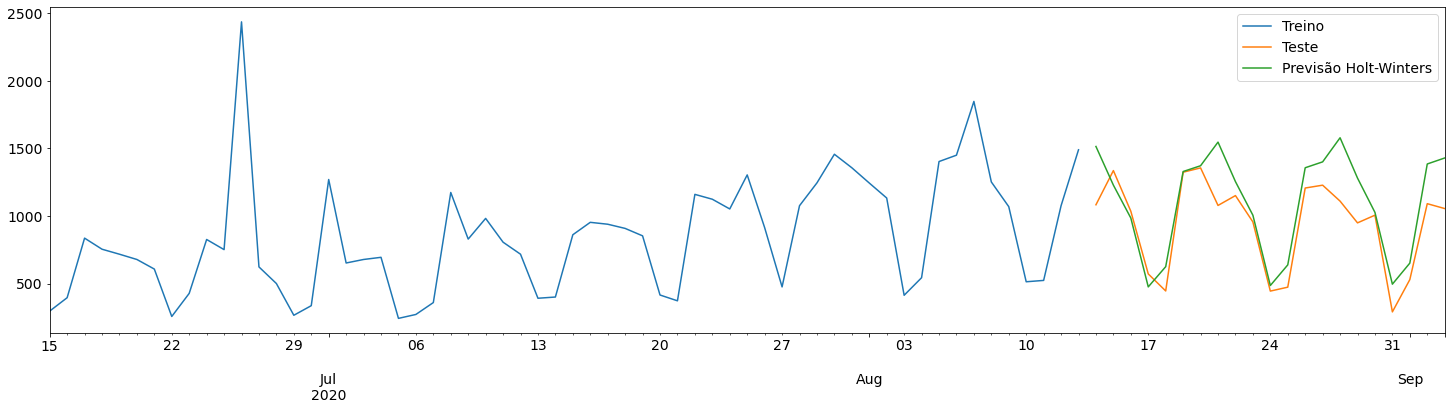

In [22]:
treino['deaths'].iloc[-60:].plot(legend=True, label='Treino')
teste.deaths.plot(legend=True, label='Teste')
holt_winters_mult.plot(legend=True, label='Previsão Holt-Winters');

### Modelo SARIMA

O modelo *SARIMA* é uma variação do modelo *ARIMA*, que tem em sua estrutura os seguintes componentes:


- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.

A principal diferença entre os modelos ARIMA e SARIMA são os componentes sazonais presente no modelo SARIMA, a representação do modelo pode ser entendida da seguinte forma:

**SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

A aplicação do modelo *SARIMA* será feita pela função *SARIMAX* presente na biblioteca *statsmodels.tsa.statespace.sarimax*, sendo que a escolha do melhor modelo será feita através da função *auto_arima* presente na biblioteca *pmdarima* com os seguintes componentes:

- Período Sazonal: 7 dias
- Valor máximo do componente Autoregressivo (AR)\[p \| P\]: 30
- Valor máximo do componente Integrado \[d \| D\]: 30
- Valor máximo do componente Médias Móveis (MA) \[q \| Q\]: 30

Com a escolha do melhor modelo, o mesmo será aplicado sob a base de treinamento e após isso será realizado a predição para os próximos 21 dias e terá o seu valor armazenado na base original de COVID-19.



In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

Escolha do melhor modelo utilizando a função _auto_arima_.

In [24]:
stepwise_fit = auto_arima(treino.deaths, start_p=0, start_q=0,
                            max_p = 30,
                            max_d = 30,
                            max_q = 30,
                            m = 7,
                            seasonal = True,
                            trace = True,
                            error_action = 'ignore',   
                            suppress_warnings = True,
                            stepwise = True
                            );

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3418.337, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3418.461, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3353.998, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3349.965, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3416.506, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3359.632, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=3306.511, Time=0.84 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=3340.881, Time=0.34 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=3303.356, Time=3.19 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=3311.891, Time=1.91 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=3304.980, Time=2.73 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=3304.678, Time=2.33 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=3387.574, Time=2.15 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=3299.588, Time=3.28 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept

In [25]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  226
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 7)   Log Likelihood               -1640.382
Date:                           Sun, 20 Sep 2020   AIC                           3294.764
Time:                                   18:07:59   BIC                           3318.677
Sample:                                        0   HQIC                          3304.415
                                           - 226                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0486      0.105     -0.463      0.643      -0.255       0.157
ar.L2          0.2225      0.095      2.349      0.019       0.037       0.408
ma.L1         -0.7024      0.090     -7.773      0.000      -0.880      -0.525
ar.S.L7        0.7243      0.163      4.457      0.000       0.406       1.043
ar.S.L14       0.1824      0.117      1.558      0.119      -0.047       0.412
ma.S.L7       -0.5948      0.147     -4.055      0.000      -0.882      -0.307
sigma2      1.231e+05   3686.458     33.396      0.000    1.16e+05     1.3e+05
===================================================================================
Ljung-Box (Q):                       64.19   Jarque-Bera (JB):              5609.27
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):           58828.85   Skew:                             2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Após a aplicação do processo de _StepWise_ o melhor modelo selecionado é o seguinte: SARIMA(2, 1, 1)x(2, 0, 1)\[7\]

Este modelo possui os seguintes componentes:
- Não sazonais:
    - Uma compenente auto regressiva não sazonal de ordem 2
    - Uma componente integrada não sazonal de ordem 1
    - Uma componente de média móvel não sazonal de ordem 1

- Sazonais:
    - Uma compenente auto regressiva sazonal de ordem 2
    - Uma componente integrada sazonal de ordem 0
    - Uma componente de média móvel sazonal de ordem 1
- Sazonalidade de período 7 dias

Aplicação do modelo sob a base de treinamento utilizando a função *SARIMAX*

In [26]:
sarima_model = SARIMAX(
    treino.deaths,
    order = (2, 1, 1),
    seasonal_order = (2, 0, 1, 7)
    )

sarima_result = sarima_model.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  226
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 7)   Log Likelihood               -1640.382
Date:                           Sun, 20 Sep 2020   AIC                           3294.764
Time:                                   18:08:02   BIC                           3318.677
Sample:                               01-01-2020   HQIC                          3304.415
                                    - 08-13-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0486      0.105     -0.463      0.643      -0.255       0.157
ar.L2          0.2225      0.095      2.349      0.019       0.037       0.408
ma.L1         -0.7024      0.090     -7.773      0.000      -0.880      -0.525
ar.S.L7        0.7243      0.163      4.457      0.000       0.406       1.043
ar.S.L14       0.1824      0.117      1.558      0.119      -0.047       0.412
ma.S.L7       -0.5948      0.147     -4.055      0.000      -0.882      -0.307
sigma2      1.231e+05   3686.458     33.396      0.000    1.16e+05     1.3e+05
===================================================================================
Ljung-Box (Q):                       64.19   Jarque-Bera (JB):              5609.27
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):           58828.85   Skew:                             2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predição dos próximos 21 dias com base nos parâmetros estimados pela função *SARIMAX*

In [27]:
# Obtain predicted values
inicio = len(treino)
fim = len(treino) + len(teste) - 1

pred_SARIMA = sarima_result.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(2, 1, 1)x(2, 0, 1)[7]')
pred_SARIMA.index = teste.index

covid['SARIMA'] = pred_SARIMA
covid.tail(10)

,confirmed,deaths,Holt,Holt-Winters,SARIMA
2020-08-25,38298,473,1017.232600,637.948705,834.005183
2020-08-26,38119,1207,1011.163125,1357.011360,1279.550981
2020-08-27,42848,1228,1005.129865,1400.614063,1410.136788
2020-08-28,45909,1110,999.132603,1579.070223,1431.833781
2020-08-29,49654,949,993.171124,1280.547958,1298.077220
2020-08-30,44143,1006,987.245216,1026.494285,1155.775703
2020-08-31,35581,290,981.354665,495.239969,808.144360
2020-09-01,33850,529,975.499261,651.101433,897.805052
2020-09-02,44639,1091,969.678795,1384.906999,1308.287681
2020-09-03,38754,1055,963.893057,1429.321724,1416.192139


No gráfico abaixo é possível comparar a predição realizada pelo modelo SARIMA com a base de Treinamento e de Teste.

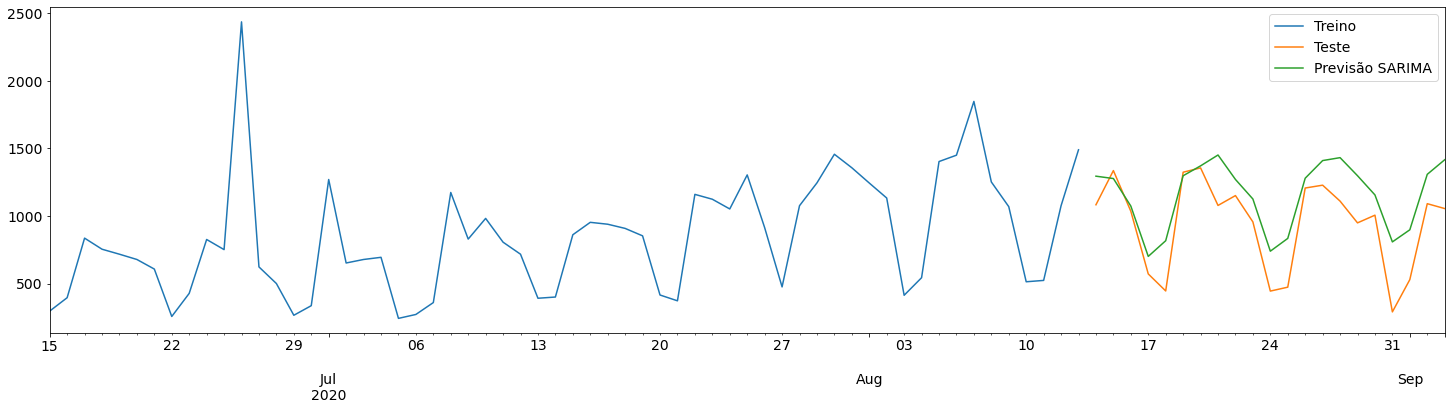

In [28]:
treino['deaths'].iloc[-60:].plot(legend=True, label='Treino')
teste.deaths.plot(legend=True, label='Teste')
pred_SARIMA.plot(legend=True, label='Previsão SARIMA');

### Redes dinâmicas

Para a estimação de mortes por COVID-19 utilizando métodos de Redes Dinâmicas será realizado alguns pré-processamentos:

- Reamostragem:
> - Base de Treinamento: 226 registros com somente as informações de *morte*
> - Base de Teste: 21 registros com somente as informações de *morte*

- Normalização da Amostra:
> Como os valores das mortes podem apresentar grandes variações em seus pontos, é feita uma Normalização dos valores através da função *MinMaxScaler* presente na biblioteca *sklearn.preprocessing*.<br>
> Nesta Normalização, os valores da base de Treinamento ficam entre 0 e 1 e a base de teste ficam entre 0,05 e 0,27.


Com a estimação dos parâmetros do melhor modelo, o mesmo será aplicado sob a base de treinamento e após isso será realizado a predição para os próximos 21 dias e terá o seu valor armazenado na base original de COVID-19.

In [29]:
from sklearn.preprocessing import MinMaxScaler

din_treino = covid[['deaths']].iloc[:226] 
din_teste = covid[['deaths']].iloc[226:]

scaler = MinMaxScaler()
scaler.fit(din_treino)

MinMaxScaler()

In [30]:
scaled_train = scaler.transform(din_treino)
scaled_test = scaler.transform(din_teste)

In [31]:
print(scaled_train.min(),scaled_train.max())

0.0 1.0


In [32]:
print(scaled_test.min(),scaled_test.max())

0.0588474025974026 0.27516233766233766


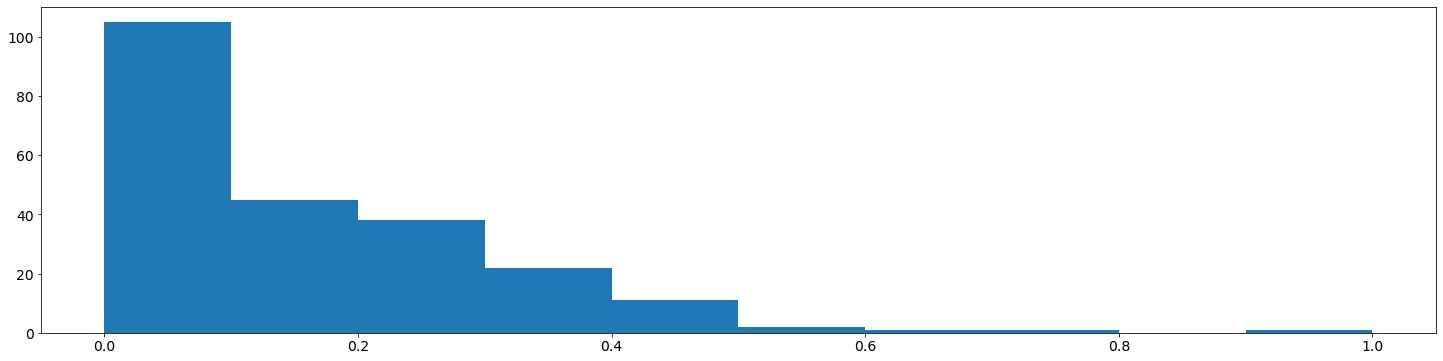

In [33]:
plt.hist(scaled_train);

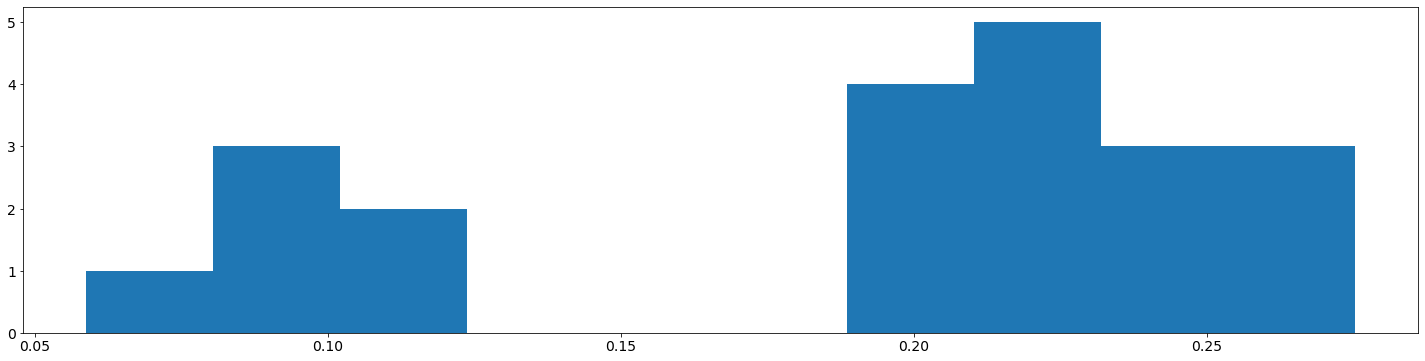

In [34]:
plt.hist(scaled_test);

Para a geração do modelo será necessário gerar "batches" contendo novas amostras que serão utilizadas para o treinamento do modelo.<br>

A geração desses "batches" será feito através da função *TimeseriesGenerator* presente na biblioteca *keras.preprocessing.sequence*, indicando o n_input como 7 para denotar que os dados apresentam sazonalidade a cada 7 dias.

O modelo a ser aplicado é o *Long Short-Term Memory* (LSTM) apresentado inicialmente em 1997 por Sepp Hochreiter e Jurgen Schmidhuber. 

Para a geração do modelo em si, as seguintes funções serão utilizadas:

- *Sequential*: biblioteca *keras.models*
- *Dense*: biblioteca *keras.layers*
- *LSTM*: biblioteca *keras.layers*

Como método de ativação do modelo será utilizado o *Rectified Linear Unit* (ReLu), o método de otimização será o *ADAM* e como método para avaliação de performance será utilizado *MSE* (erro quadrático médio).

In [35]:
from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [36]:
# defina o gerador
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

In [37]:
# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit_generator(generator, epochs=150)


Epoch 1/150
110/110 [==============================] - 2s 15ms/step - loss: 0.0182
Epoch 2/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0082
Epoch 3/150
110/110 [==============================] - 1s 8ms/step - loss: 0.0077
Epoch 4/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0079
Epoch 5/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 6/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 7/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0080
Epoch 8/150
110/110 [==============================] - 1s 8ms/step - loss: 0.0077
Epoch 9/150
110/110 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 10/150
110/110 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 11/150
110/110 [==============================] - 1s 8ms/step - loss: 0.0075
Epoch 12/150
110/110 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 13/15

Após a aplicação do modelo é possível visualizar a curva de erro apresentado durante o treinamento.

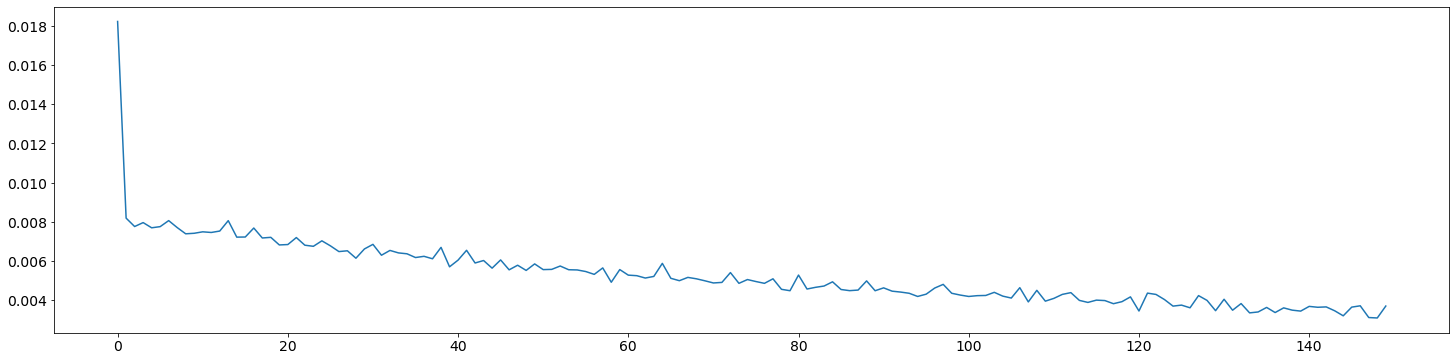

In [40]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch);

In [41]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(din_teste)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
din_teste['LSTM'] = true_predictions
din_teste['LSTM'].index = covid['deaths'].index[226:]

covid['LSTM'] = din_teste['LSTM']
covid.tail(10)

,confirmed,deaths,Holt,Holt-Winters,SARIMA,LSTM
2020-08-25,38298,473,1017.232600,637.948705,834.005183,569.634893
2020-08-26,38119,1207,1011.163125,1357.011360,1279.550981,770.261935
2020-08-27,42848,1228,1005.129865,1400.614063,1410.136788,1053.727188
2020-08-28,45909,1110,999.132603,1579.070223,1431.833781,1101.394554
2020-08-29,49654,949,993.171124,1280.547958,1298.077220,1142.027560
2020-08-30,44143,1006,987.245216,1026.494285,1155.775703,1009.467403
2020-08-31,35581,290,981.354665,495.239969,808.144360,824.555448
2020-09-01,33850,529,975.499261,651.101433,897.805052,676.998526
2020-09-02,44639,1091,969.678795,1384.906999,1308.287681,679.489811
2020-09-03,38754,1055,963.893057,1429.321724,1416.192139,915.868773


No gráfico abaixo é possível comparar a predição realizada pelo modelo LSTM com a base de Treinamento e de Teste.

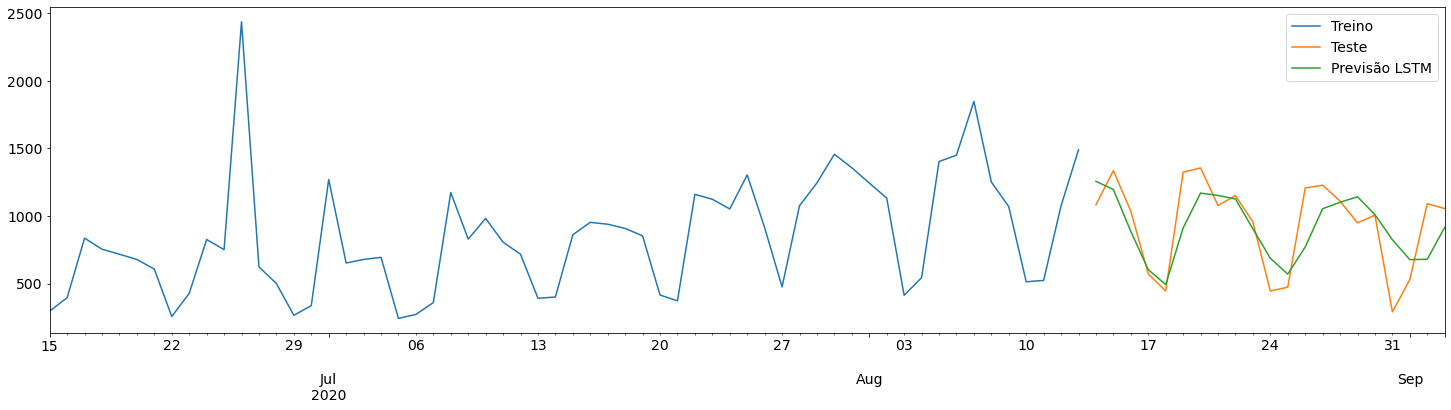

In [44]:
treino['deaths'].iloc[-60:].plot(legend=True, label='Treino')
teste.deaths.plot(legend=True, label='Teste')
din_teste['LSTM'].plot(legend=True, label='Previsão LSTM');

4. Utilize o erro quadrático médio e erro absoluto médio para comparar as previsões
obtidas com as observações da base de teste.

## Avaliação de Modelos

Para a avaliação da performance dos modelos aplicados os métodos de *Erro Quadrático Médio* (MSE) e *Erro Absoluto Médio* (MAE), a avaliação dessas métricas será feita através das seguintes funções da biblioteca *sklearn.metrics*:

- MSE: *mean_squared_error*
- MAE: *mean_absolute_error*

Os modelos que serão avaliados são os seguintes:

- Holt Multiplicativo
- Holt-Winters com Tendência aditiva e Sazonalidade Multiplicativa
- SARIMA(2, 1, 1)x(2, 0, 1)\[7\]
- Long Short-Term Memory (LSTM)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
d = {
    'Holt':  [
        mean_squared_error(
            din_teste['deaths'],
            holt_mult.apply(np.ceil)
            ),
        mean_absolute_error(
            din_teste['deaths'],
            holt_mult.apply(np.ceil)
            )],
    'Holt Winters':  [
        mean_squared_error(
            din_teste['deaths'],
            holt_winters_mult.apply(np.ceil)
            ),
        mean_absolute_error(
            din_teste['deaths'],
            holt_winters_mult.apply(np.ceil)
            )],
    'SARIMA':  [
        mean_squared_error(
            din_teste['deaths'],
            pred_SARIMA.apply(np.ceil)
            ),
        mean_absolute_error(
            din_teste['deaths'],
            pred_SARIMA.apply(np.ceil)
            )],
    'LSTM': [
        mean_squared_error(
            din_teste['deaths'],
            din_teste['LSTM'].apply(np.ceil)
            ),
        mean_absolute_error(
            din_teste['deaths'],
            din_teste['LSTM'].apply(np.ceil)
            )]
    }
i = ['MSE', 'MAE']

modelos_avaliados = pd.DataFrame(data = d, index = i)

modelos_avaliados.head()

,Holt,Holt Winters,SARIMA,LSTM
MSE,110329.666667,55879.857143,70451.095238,52932.238095
MAE,251.380952,183.857143,224.809524,175.190476


Com a aplicação das métricas de avaliação de modelos é possível identificar os modelos que tiveram uma melhor performance, sendo a ordem dos modelos apresentada a seguir:

|   	|    Modelo    	|    MSE    	|   MAE  	|
|:---:	|:------------:	|:---------:	|:------:	|
| 1 	|     LSTM     	| 52932,23 	 	| 175,19 	|
| 2 	| Holt-Winters 	|  55879,85 	| 183,85 	|
| 3 	|    SARIMA    	|  70451,09 	| 224,80 	|
| 4 	|     Holt     	| 110329,66 	| 251,38 	|



In [47]:
covid.to_csv('covidUSA_modelos.csv')

5. Considere o método que produziu a melhor previsão para os dados de teste e faça a
previsão para mais 14 dias (além das observações da base de dados). Essa
previsão pode ser apresentada com um gráfico nos arquivos .ipynb e .pdf.

## Predição de novos 14 dias

Com a definição do melhor como sendo o *LSTM*, realizamos a predição de novos 14 dias após o dia 09/03/2020 que é o ultimo registro na base.

A predição pode ser visualizada no gráfico indicado abaixo.

In [48]:
modelo =  ExponentialSmoothing(covid[covid.deaths > 0].deaths, trend='additive', seasonal='multiplicative', seasonal_periods=7).fit()
holt_winters_mult = modelo.forecast(14).rename('Holt-Winters 14 dias')

# covid['Holt-Winters-14d'] = holt_winters_mult

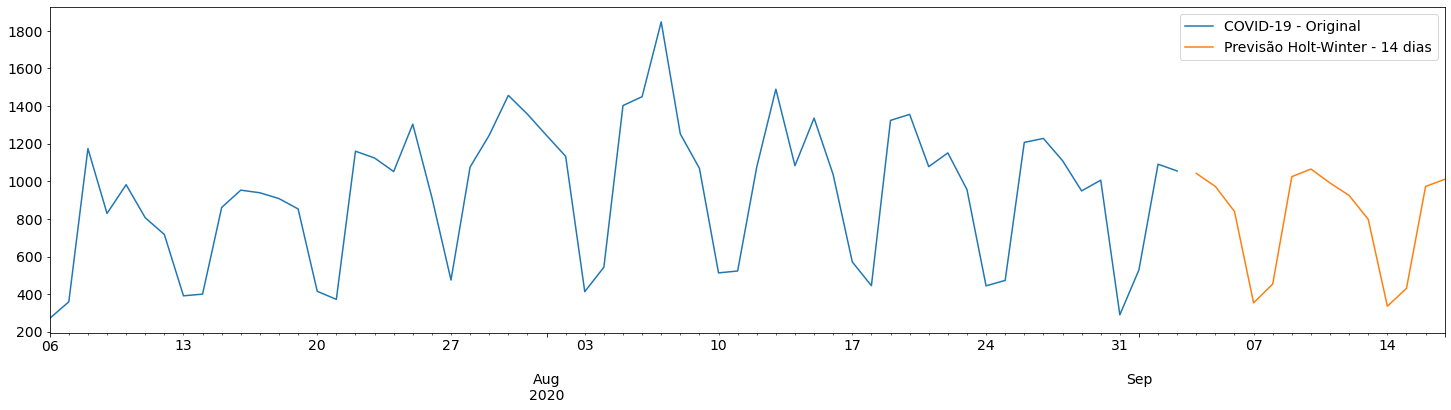

In [49]:
covid['deaths'].iloc[-60:].plot(legend=True, label='COVID-19 - Original')
holt_winters_mult.plot(legend=True, label='Previsão Holt-Winter - 14 dias');